In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle as pkl
from scipy import stats

import csv
import sys
import pandas as pd
import os

from DavioPlotter import *

cutMode = 0 # 0 = Final Selection, 1 = Kin Cut Sample, 2 = High E, 3 = Low BDT, 4 = 
cutmodedir = {0:'FinalSelection',1:'KinCut',2:'HighE',3:'LowBDT'}[cutMode]

lowEpatch = False#True if fset in [0,5,8,9] else False
vtxCut    = 5#np.inf


DAT_POT1 = 1.631e+20#-1.613e+20
DAT_POT2 = 2.750e+20#-2.687e+20
DAT_POT3 = 2.291e+20#-2.017e+20

    
DATA_POT_TOT = DAT_POT1 + DAT_POT2 + DAT_POT3


print(DAT_POT1,DAT_POT2,DAT_POT3)
print(DAT_POT1+DAT_POT2+DAT_POT3)

def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k


1.631e+20 2.75e+20 2.291e+20
6.672e+20


In [2]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}
dfswap = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        print('Sample:',filetag)
        pstring = 'SelectionMode%i_%s_fset12_run%i.parquet.gzip'%(cutMode,filetag,r)
        pstringswap = 'SelectionMode%i_%s_run%i_r23swap.parquet.gzip'%(cutMode,filetag,r)
        try:
            df[r][filetag] = pd.read_parquet(psavedir+pstring)
            dfswap[r][filetag] = pd.read_parquet(psavedir+pstringswap)
            print(len(df[r][filetag]))
            print(len(dfswap[r][filetag]))
        except:
            print('No Events')
            pass
        
df[2]['ext'] = df[3]['ext'].copy()
dfswap[2]['ext'] = dfswap[3]['ext'].copy()



 #################### RUN 1 #################### 

Sample: ext
263
263
Sample: overlay
5602
5602
Sample: intrinsics
14733
14733
Sample: ncpi0
589
589
Sample: ccpi0
285
285


 #################### RUN 2 #################### 

Sample: ext
No Events
Sample: overlay
5784
5784
Sample: intrinsics
11241
11241


 #################### RUN 3 #################### 

Sample: ext
537
537
Sample: overlay
3943
3943
Sample: intrinsics
5940
5940
Sample: ncpi0
504
504
Sample: ccpi0
266
266


In [3]:
    

varb_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','PTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MPIDY_muon',
              'MPIDY_proton','MPIDY_eminus','shower_fraction',
              'Shower_Consistency',
              'EnuQE_lepton','EnuQE_proton',
              'Proton_TrackLength','Lepton_TrackLength','EnuTrue']

var_labels = [r'$E_\nu^{Range}$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV]',r'$Q_3$ [MeV]',r'$\theta_e + \theta_p$',r'$|\phi_e - \phi_p|$',r'Event $p_T/p$',
              r'$\theta_p$',r'$\phi_p$',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$',r'$\phi_e$',
              'Opening Angle',r'$X_{reco}$',r'$Y_{reco}$','$Z_{reco}$',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{Q-e}$',r'$E_\nu^{QE-p}$',
              'Proton Track Length [cm]','Lepton Track Length [cm]',r'$E_\nu^{True}$ [MeV]']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(60,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0.0,1.0),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,100),(0,200),(0,1200)]

varlabel_dict = {name:label for name,label in zip(varb_names,var_labels)}
range_dict = {name:rnge for name,rnge in zip(varb_names,ranges)}

if cutMode in [0,2]: range_dict['sigprob'] = (0.95,1.0)
    

In [4]:
# HELPER FUNCTIONS
#detsystag = '2August2021'
detsystag = '5Apr2021'

def getSysErrors(nbins,varName,mode,sigcut,rwtnameoverride=None,nsbmode=0):
    try:
        if nsbmode in [1,2,3]: 
            if nsbmode!=3: det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/14July2021/covMatrix/'+mode+'/BDTcut'+str(sigcut)+'/nsbmode'+str(nsbmode)+'/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
            if nsbmode==3: det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/'+detsystag+'/covMatrix/'+mode+'/BDTcut0.95/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
            elif varName=='Enu_1e1p':
                det_sys_tmp = np.zeros((12,12))
                if nsbmode==1: det_sys_tmp[5:,5:] = det_sys_m
                if nsbmode==2: det_sys_tmp[5:7,5:7] = det_sys_m
                det_sys_m = det_sys_tmp
        else: det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/'+detsystag+'/covMatrix/'+mode+'/BDTcut'+str(sigcut)+'/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
    except:
        print('No det sys')
        det_sys_m = np.zeros((nbins,nbins))
            
    try:
        if rwtnameoverride is not None:
            rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_'+rwtnameoverride+'__'+varName+'.txt')
        else:
            if varName=='sigprob': varName='sigprobavg'
            rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_'+cutmodedir+'__'+varName+'.txt')
    except:
        print('No rwt sys')
        rwt_sys_m = np.zeros((nbins,nbins))
    
    if nsbmode==3 and varName=='MPIDY_muon':
        det_sys_tmp = np.zeros((3,3))
        rwt_sys_tmp = np.zeros((3,3))
        det_sys_tmp[:2,:2] = det_sys_m[:2,:2]
        rwt_sys_tmp[:2,:2] = rwt_sys_m[:2,:2]
        det_sys_tmp[1,2] = det_sys_m[1,7]
        det_sys_tmp[0,2] = det_sys_m[0,7]
        det_sys_tmp[2,1] = det_sys_m[7,1]
        det_sys_tmp[2,0] = det_sys_m[7,0]
        det_sys_tmp[2,2] = det_sys_m[7,7]
        rwt_sys_tmp[1,2] = rwt_sys_m[1,7]
        rwt_sys_tmp[0,2] = rwt_sys_m[0,7]
        rwt_sys_tmp[2,1] = rwt_sys_m[7,1]
        rwt_sys_tmp[2,0] = rwt_sys_m[7,0]
        rwt_sys_tmp[2,2] = rwt_sys_m[7,7]
        det_sys_m,rwt_sys_m = det_sys_tmp,rwt_sys_tmp
    
    rwt_sys_m = np.where(np.isnan(rwt_sys_m),0,rwt_sys_m)
    det_sys_m = np.where(np.isnan(det_sys_m),0,det_sys_m)
    return rwt_sys_m,det_sys_m

def getDetSysTot(det_sys_nue,nue,numu):
    det_sys_numu = np.diag(0.04*np.ones(det_sys_nue.shape[0]))
    tot = nue+numu
    return (det_sys_nue * np.outer(nue,nue) + det_sys_numu * np.outer(numu,numu))/np.outer(tot,tot)
    

def MakeBDTcut(idf,sigcut,mode,nBDTs,r2overlay=False,ttc=0.1):
    
    # Conglemerate BDT scores and weights based on strategy 
    
    bdtweight = np.zeros(idf.shape[0])
    sigprobmax = np.zeros(idf.shape[0]) 
    sigprobavg = np.zeros(idf.shape[0])
    sigprobmedian = np.zeros(idf.shape[0])
    sigproblist = np.zeros((idf.shape[0],nBDTs))
    notintrain = np.zeros((idf.shape[0],nBDTs),dtype=bool)
    numnottrain = np.zeros(idf.shape[0])
    for b in range(nBDTs):
        sp = idf['sigprob%i'%b]
        tvw = idf['tvweight%i'%b]
        sigprobmax = np.where(np.logical_and(tvw>0,sp>sigprobmax),sp,sigprobmax) # cut on the maximum non-train score in ensemble
        if mode == 'fracweight': 
            #bdtweight += np.where(sp>sigcut,tvw/float(nBDTs),0)
            bdtweight += np.where((tvw>ttc) & (sp>sigcut),1.0,0.0)
        sigprobavg += np.where(tvw>ttc,sp,0)
        numnottrain += np.where(tvw>ttc,1,0)
        sigproblist[:,b] = sp
        notintrain[:,b] = tvw > ttc
    sigprobavg /= np.where(numnottrain>0,numnottrain,1)
    for i,(tlist,siglist) in enumerate(zip(notintrain,sigproblist)):
        splist = siglist[tlist]
        if splist.size!=0: sigprobmedian[i] = np.median(splist)
        else: sigprobmedian[i] = 0
        
    idf['sigprobavg'] = sigprobavg
    idf['sigprobmedian'] = sigprobmedian
    idf['sigprobmax'] = sigprobmax

    
    if mode == 'avgscore':
        idf['sigprob'] = idf['sigprobavg']
        bdtweight = np.where(sigprobavg>sigcut,1,0)
    elif mode == 'medianscore':
        idf['sigprob'] = idf['sigprobmedian']
        bdtweight = np.where(sigprobmedian>sigcut,1,0)
    elif mode == 'fracweight':
        idf['sigprob'] = idf['sigprobmax']
        bdtweight /= np.where(numnottrain>0,numnottrain,1)
    
    idf['bdtweight'] = bdtweight
    
    # Drop duplicates
    
    idf.sort_values(by=['run','subrun','event','sigprob'],ascending=False,inplace=True)
    if r2overlay:
        idf.drop_duplicates(subset=['run','subrun','event','EnuTrue'],inplace=True)
    else:
        idf.drop_duplicates(subset=['run','subrun','event'],inplace=True)
    
def SaveTextFile(idf,run,filetag,sigcut,mode,tsavedir):
    nBDTs = int(idf['nBDTs'][0])
    MakeBDTcut(idf,sigcut,mode,nBDTs)
    idf.query('sigprob > @sigcut',inplace=True)
    savestr = 'eventlist_%s_run%i.txt'%(filetag,run)
    idf.to_csv(tsavedir+savestr,index=None,sep=' ')
    
    

2 intrinsics
5466
5466
2914
2788
2172
1962
9.620330027494848 0.22451011624048448
8.566038578653187 0.20962116967895209


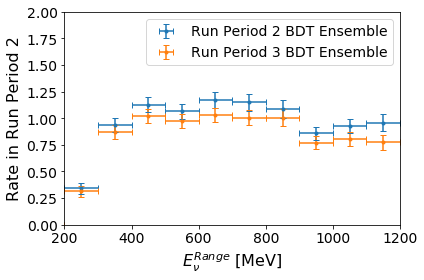

3 intrinsics
2907
2907
1450
1519
1117
1046
7.75155290563933 0.23868681703752215
7.156176021200105 0.2287509844202959


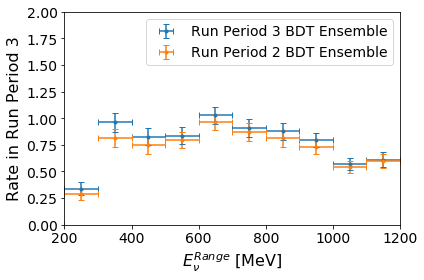

<Figure size 432x288 with 0 Axes>

In [5]:

#Binary Settings
sys     = True


#BDT Settings
bdtmode = 'avgscore'
nBDTs = 20
bdtpower = 0
cut = range_dict['sigprob'][0]

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}
    



for varName in varb_names:
    if varName not in ['Enu_1e1p']: continue
    if varName=='EnuTrue' and not finalPred: continue
    
        
    xlab = varlabel_dict[varName]
        
    bins  = 12 if varName in ['Enu_1e1p','EnuQE_proton','EnuQE_lepton','EnuTrue'] else 10
    low   = (range_dict[varName])[0]
    high  = (range_dict[varName])[1]
    
    binrange = np.linspace(low,high,bins+1)

    for r in [2,3]:
        dat = []
        w = []
        dats = []
        ws = []
        for filetag in df[r].keys():
            if not lowEpatch and 'lowE' in filetag: continue
            if filetag!='intrinsics': continue
            dfc = df[r][filetag].copy()
            dfcs = dfswap[r][filetag].copy()    

            MakeBDTcut(dfc,cut,bdtmode,nBDTs,(r==2 and filetag=='overlay'),ttc=0.1)
            MakeBDTcut(dfcs,cut,bdtmode,nBDTs,(r==2 and filetag=='overlay'),ttc=0.1)

            numu_l = np.core.defchararray.find(np.array(dfc['label'],dtype=np.string_),'m')!=-1
            labels = np.where(np.logical_and(numu_l,dfc['scedr']>vtxCut),'offvtx',dfc['label'])

            dfc['label'] = labels


            weights = dfc['GenieWeight'] * dfc['POTweight']**(-1)
            weights*= dfc['bdtweight']
            weights*=dfc['Enu_1e1p']<range_dict['Enu_1e1p'][1]
            weights*=dfc['Enu_1e1p']>200

            weightssw = weights.copy()
            weights*=dfc['sigprob']>range_dict['sigprob'][0]
            weights*=dfc['sigprob']<range_dict['sigprob'][1]
            weightssw*=dfcs['sigprob']>range_dict['sigprob'][0]
            weightssw*=dfcs['sigprob']<range_dict['sigprob'][1]
        

            w+=list(weights*POTdict[r][filetag])
            dat+=list(dfc[varName])
            ws+=list(weightssw*POTdict[r][filetag])
            dats+=list(dfcs[varName])

            dfc['weights'] = weights*POTdict[r][filetag]
            dfcs['weights'] = weightssw*POTdict[r][filetag]
            print(r,filetag)
            print(len(dfc.query('label==\'nue_ccqe\'')))
            print(len(dfcs.query('label==\'nue_ccqe\'')))
            print(len(dfc.query('label==\'nue_ccqe\' and  bdtweight>0')))
            print(len(dfcs.query('label==\'nue_ccqe\' and bdtweight>0')))
            print(len(dfc.query('label==\'nue_ccqe\' and  weights>0')))
            print(len(dfcs.query('label==\'nue_ccqe\' and weights>0')))
        w = np.where(np.isnan(np.array(w)),0,np.array(w))
        ws = np.where(np.isnan(np.array(ws)),0,np.array(ws))
        n,xb,_ = plt.hist(dat,bins=bins,range=(low,high),weights=w,alpha=0.5)
        v,_,_ = plt.hist(dat,bins=bins,range=(low,high),weights=w**2,alpha=0.5)
        ns,_,_ = plt.hist(dats,bins=bins,range=(low,high),weights=ws,alpha=0.5)
        vs,_,_ = plt.hist(dats,bins=bins,range=(low,high),weights=ws**2,alpha=0.5)
        print(sum(n),np.sqrt(sum(v)))
        print(sum(ns),np.sqrt(sum(vs)))
        plt.clf()
        xbc = 0.5*(xb[:-1]+xb[1:])
        xbw = 0.5*(xb[1:]-xb[:-1])
        if r==2:
            l = 'Run Period 2 BDT Ensemble'
            ls = 'Run Period 3 BDT Ensemble'
            yl = 'Rate in Run Period 2'
        elif r==3:
            l = 'Run Period 3 BDT Ensemble'
            ls = 'Run Period 2 BDT Ensemble'
            yl = 'Rate in Run Period 3'
        plt.errorbar(x=xbc,xerr=xbw,y=n,yerr=np.sqrt(v),label=l,fmt='.',capsize=3)
        plt.errorbar(x=xbc,xerr=xbw,y=ns,yerr=np.sqrt(vs),label=ls,fmt='.',capsize=3)
        plt.xlabel(xlab,fontsize=16)
        plt.ylabel(yl,fontsize=16)
        plt.legend(fontsize=14)
        plt.xlim(200,1200)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylim(0,2)
        plt.tight_layout()
        plt.savefig('Plots/PRD_plots/BDTswap_r%i.png'%r,dpi=100)
        plt.show()
        pkl.dump(  plt.gcf(),  open('Plots/PRD_plots/BDTswap_r%i.pickle'%r,  'wb')  )
        plt.clf()
    